# Uyku Verimliliği Projesi
### Halil Kolatan

----
## Kütüphaneleri yükleyelim
---

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import datetime
import plotly.io as pio
pio.renderers.default='iframe'
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget

----
## Veri setini yükleyelim
---

In [2]:
df=pd.read_csv("Sleep_Efficiency.csv")

### Veri setini incelemeye başlayalım

İncelemeye başlamadan önce burada bazı temel bilgileri verelim. Bu veri seti uyku ve uykuyu etkileyen parametreleri içeren bir veri setidir. Deneklerin ID'si, yaşı, cinsiyeti, yatış ve kalkış zamanı, uyanık kaldığı zaman, uyku sırasında uyanma sayısı, uyku süresi (derin, hafif, REM uykusu) gibi birçok değişken içermektedir. Uyku verimliliği parametresi ise yatakta geçirilen zamanda gerçekten uyunulan zamanın bir oranıdır. Bu veri setiyle uyku verimliliği ve uyku süresi arasındaki ilişkiyi inceleyebilir, uyku kalitesinin faktörlerini ele alabilir ve kahve, alkol ve egzersiz gibi farklı değişkenlerin uyku kalitesi üzerine etkisini inceleyebiliriz.

In [3]:
df.info # Burada veri seti hakkında bilgileri alırız.

<bound method DataFrame.info of       ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66

In [4]:
df.head()

ID  Age  Gender              Bedtime          Wakeup time  Sleep duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   

   Alcohol consumption Smoking status  Exercise frequency  
0                  0.0            Yes                 3.0  
1                  3.0            Yes                 3.0  
2                  0.0             No                 3.0  
3                  5.0            Yes                 1.0  
4                  3.0             No                 3.0

Veriyi kullanmadan önce bazı düzenlemeler yapalım.

In [5]:
df.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration',"Sleep efficiency":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
                     "Alcohol consumption":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency":"Exercise_frequency"}, inplace = True)

In [6]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup_time', 'Sleep_duration',
       'Sleep_efficiency', 'REM_sleep_percentage', 'Deep_sleep_percentage',
       'Light_sleep_percentage', 'Awakenings', 'Caffeine_consumption',
       'Alcohol_consumption', 'Smoking_status', 'Exercise_frequency'],
      dtype='object')

In [7]:
df.head() # head() metodu ile verinin ilk beş satırını görebiliriz.

ID  Age  Gender              Bedtime          Wakeup_time  Sleep_duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   

   Sleep_efficiency  REM_sleep_percentage  Deep_sleep_percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light_sleep_percentage  Awakenings  Caffeine_consumption  \
0                      12         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   

   Alcohol_consumption Smoking_status  Exercise_frequency  
0                  0.0            Yes                 3.0  
1                  3.0            Yes                 3.0  
2                  0.0             No                 3.0  
3                  5.0            Yes                 1.0  
4                  3.0             No                 3.0

In [8]:
df.head(7) # head(n) parantez içine istediğimiz değeri yazarak görebileceğimiz satır sayısını değiştirebiliriz.

ID  Age  Gender              Bedtime          Wakeup_time  Sleep_duration  \
0   1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00             6.0   
1   2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00             7.0   
2   3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00             8.0   
3   4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00             6.0   
4   5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00             8.0   
5   6   36  Female  2021-07-01 21:00:00  2021-07-01 04:30:00             7.5   
6   7   27  Female  2021-07-21 21:00:00  2021-07-21 03:00:00             6.0   

   Sleep_efficiency  REM_sleep_percentage  Deep_sleep_percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   
5              0.90                    23                     60   
6              0.54                    28                     25   

   Light_sleep_percentage  Awakenings  Caffeine_consumption  \
0                      12         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   
5                      17         0.0                   NaN   
6                      47         2.0                  50.0   

   Alcohol_consumption Smoking_status  Exercise_frequency  
0                  0.0            Yes                 3.0  
1                  3.0            Yes                 3.0  
2                  0.0             No                 3.0  
3                  5.0            Yes                 1.0  
4                  3.0             No                 3.0  
5                  0.0             No                 1.0  
6                  0.0            Yes                 1.0

In [9]:
df.shape #452 satır ve 15 sütun bulunmaktadır.

(452, 15)

In [10]:
df.describe().T

count        mean         std   min       25%     50%  \
ID                      452.0  226.500000  130.625419   1.0  113.7500  226.50   
Age                     452.0   40.285398   13.172250   9.0   29.0000   40.00   
Sleep_duration          452.0    7.465708    0.866625   5.0    7.0000    7.50   
Sleep_efficiency        452.0    0.788916    0.135237   0.5    0.6975    0.82   
REM_sleep_percentage    452.0   22.615044    3.525963  15.0   20.0000   22.00   
Deep_sleep_percentage   452.0   52.823009   15.654235  18.0   48.2500   58.00   
Light_sleep_percentage  452.0   24.561947   15.313665   7.0   15.0000   18.00   
Awakenings              432.0    1.641204    1.356762   0.0    1.0000    1.00   
Caffeine_consumption    427.0   23.653396   30.202785   0.0    0.0000   25.00   
Alcohol_consumption     438.0    1.173516    1.621377   0.0    0.0000    0.00   
Exercise_frequency      446.0    1.791480    1.428134   0.0    0.0000    2.00   

                           75%     max  
ID                      339.25  452.00  
Age                      52.00   69.00  
Sleep_duration            8.00   10.00  
Sleep_efficiency          0.90    0.99  
REM_sleep_percentage     25.00   30.00  
Deep_sleep_percentage    63.00   75.00  
Light_sleep_percentage   32.50   63.00  
Awakenings                3.00    4.00  
Caffeine_consumption     50.00  200.00  
Alcohol_consumption       2.00    5.00  
Exercise_frequency        3.00    5.00

In [220]:
df.count()

ID                        452
Age                       452
Gender                    452
Bedtime                   452
Wakeup_time               452
Sleep_duration            452
Sleep_efficiency          452
REM_sleep_percentage      452
Deep_sleep_percentage     452
Light_sleep_percentage    452
Awakenings                432
Caffeine_consumption      427
Alcohol_consumption       438
Smoking_status            452
Exercise_frequency        446
dtype: int64

In [221]:
df["Gender"].value_counts()

Male      228
Female    224
Name: Gender, dtype: int64

In [30]:
len(df.loc[df.duplicated(subset=["ID", "Age", "Sleep_duration", "Sleep_efficiency", "REM_sleep_percentage", "Deep_sleep_percentage","Light_sleep_percentage" ]),:])

0

In [222]:
df.isnull().sum() # Bu metod ile değişkenlerin kaç tane eksik verisi olduğunu göstermektedir.

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup_time                0
Sleep_duration             0
Sleep_efficiency           0
REM_sleep_percentage       0
Deep_sleep_percentage      0
Light_sleep_percentage     0
Awakenings                20
Caffeine_consumption      25
Alcohol_consumption       14
Smoking_status             0
Exercise_frequency         6
dtype: int64

In [223]:
df.nunique()

ID                        452
Age                        61
Gender                      2
Bedtime                   424
Wakeup_time               434
Sleep_duration              9
Sleep_efficiency           50
REM_sleep_percentage       13
Deep_sleep_percentage      29
Light_sleep_percentage     29
Awakenings                  5
Caffeine_consumption        6
Alcohol_consumption         6
Smoking_status              2
Exercise_frequency          6
dtype: int64

In [224]:
df.groupby(['Gender', 'Age'])["Sleep_efficiency"].mean()

Gender  Age
Female  9      0.520
        10     0.540
        11     0.550
        12     0.560
        13     0.580
               ...  
Male    65     0.714
        66     0.880
        67     0.780
        68     0.740
        69     0.660
Name: Sleep_efficiency, Length: 101, dtype: float64

In [225]:
df.groupby(['Smoking_status'])["Sleep_efficiency"].mean()

Smoking_status
No     0.817081
Yes    0.734416
Name: Sleep_efficiency, dtype: float64

In [226]:
df.groupby(['Alcohol_consumption'])["Sleep_efficiency"].mean()

Alcohol_consumption
0.0    0.832033
1.0    0.803889
2.0    0.671351
3.0    0.750417
4.0    0.685217
5.0    0.692667
Name: Sleep_efficiency, dtype: float64

In [227]:
df.groupby(['Alcohol_consumption'])["Sleep_duration"].mean()

Alcohol_consumption
0.0    7.459350
1.0    7.555556
2.0    7.527027
3.0    7.583333
4.0    7.500000
5.0    7.083333
Name: Sleep_duration, dtype: float64

In [228]:
df.groupby(["Caffeine_consumption"])["Sleep_efficiency"].mean()

Caffeine_consumption
0.0      0.786209
25.0     0.799114
50.0     0.771589
75.0     0.845600
100.0    0.900000
200.0    0.882500
Name: Sleep_efficiency, dtype: float64

In [229]:
df.groupby(["Caffeine_consumption"])["Sleep_duration"].mean()

Caffeine_consumption
0.0      7.436019
25.0     7.670886
50.0     7.443925
75.0     7.260000
100.0    7.000000
200.0    7.500000
Name: Sleep_duration, dtype: float64

---
## Veri Görselleştirme 
---

İlk olarak insanların uyku alışkanlıklarına bakalım,

In [230]:
df["Tarih"] = pd.to_datetime(df["Wakeup_time"])
df["Kalkis"] = (df["Tarih"]).dt.hour

fig = px.pie(df, names="Kalkis", title = "Kalkış Saati", color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Dairesel grafikte insanların kalkış saatlerini görmekteyiz, bu dağılıma göre en çok kalkılan saatler sabah 5 ve 7 saatleridir.

In [231]:
df["Tarih"] = pd.to_datetime(df["Bedtime"])
df["Yatis"] = (df["Tarih"]).dt.hour

fig = px.pie(df, names="Yatis", title = "Yatış Saati", color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Burada ise yatış saatine göre bir dairesel grafik görmekteyiz. Bu grafiğe göre ise en çok yatış saati gece 12'dir.

In [232]:
fig = px.pie(df, names="Age", title = "Yaş Dağılımı")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

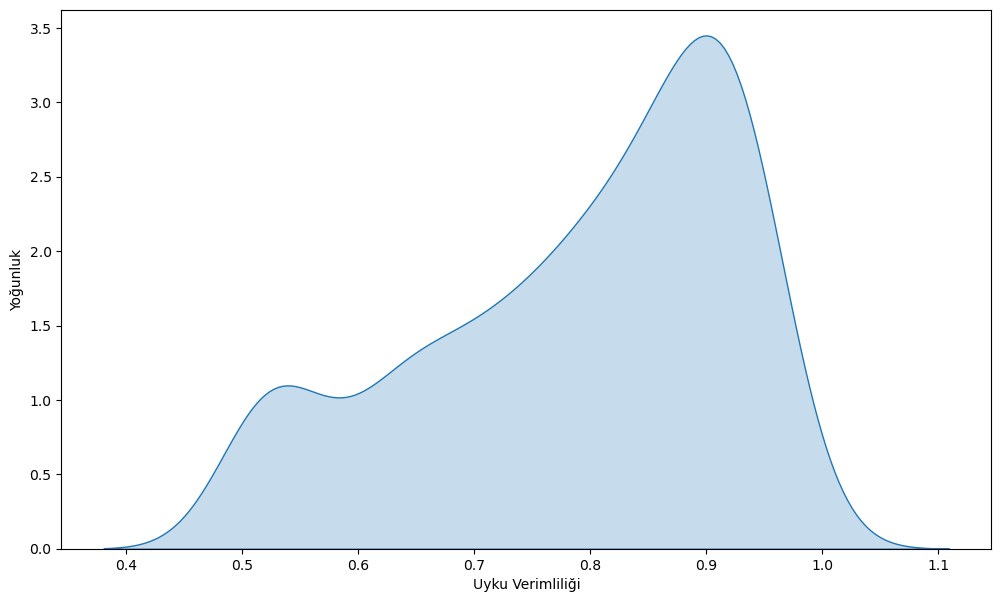

In [233]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df.Sleep_efficiency, fill = True) # kdeplot() bize yoğunluk grafiğini göstermektedir.
plt.xlabel("Uyku Verimliliği")
plt.ylabel("Yoğunluk")
plt.show()

Bu grafikte görüldüğü üzere veri setimizdeki uyku verimliliği parametresinin yoğunluğunu görmekteyiz. Yoğunluk yaklaşık olarak 0.9'dur.

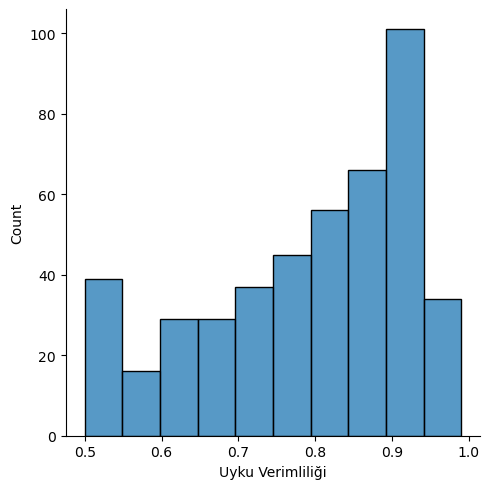

In [234]:
sns.displot(df["Sleep_efficiency"])
plt.xlabel("Uyku Verimliliği")
plt.show()

Histogram ile de aynı sonucu görebiliriz.

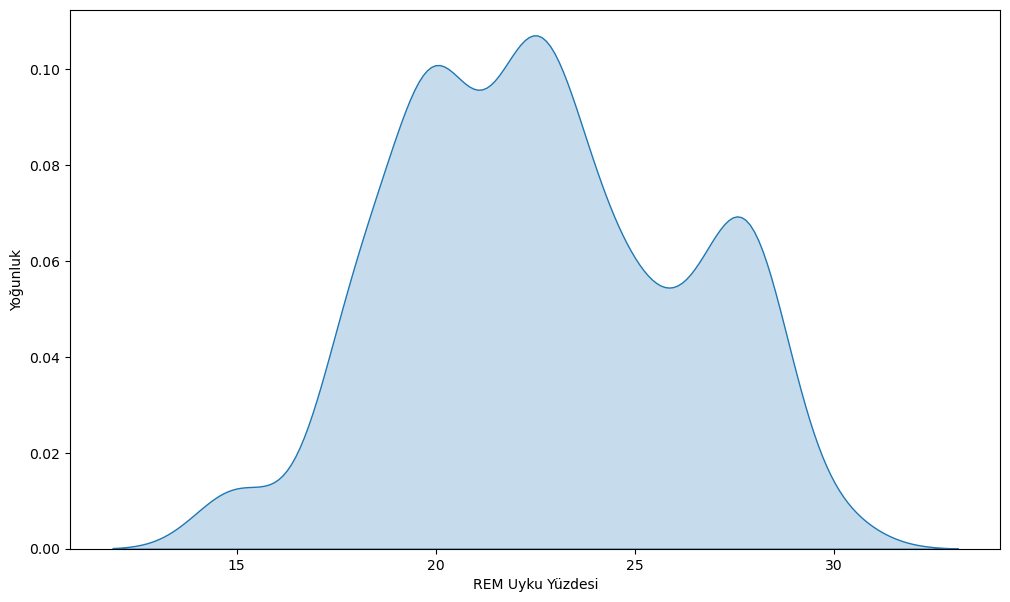

In [236]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df.REM_sleep_percentage, fill = True) # kdeplot() bize yoğunluk grafiğini göstermektedir.
plt.xlabel("REM Uyku Yüzdesi")
plt.ylabel("Yoğunluk")
plt.show()

Bu yoğunluk grafiğinde ise REM Uyku yüzdesinin yoğunlunu görmekteyiz. Deneklerin çoğunun REM Uyku yüzdesi 18-23 arasında olduğu görülmektedir.

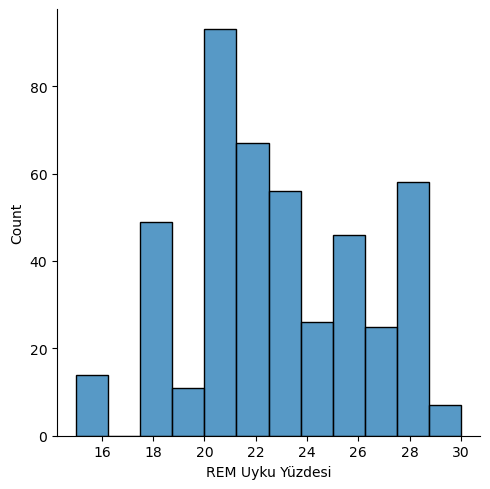

In [237]:
sns.displot(df["REM_sleep_percentage"])
plt.xlabel("REM Uyku Yüzdesi")
plt.show()

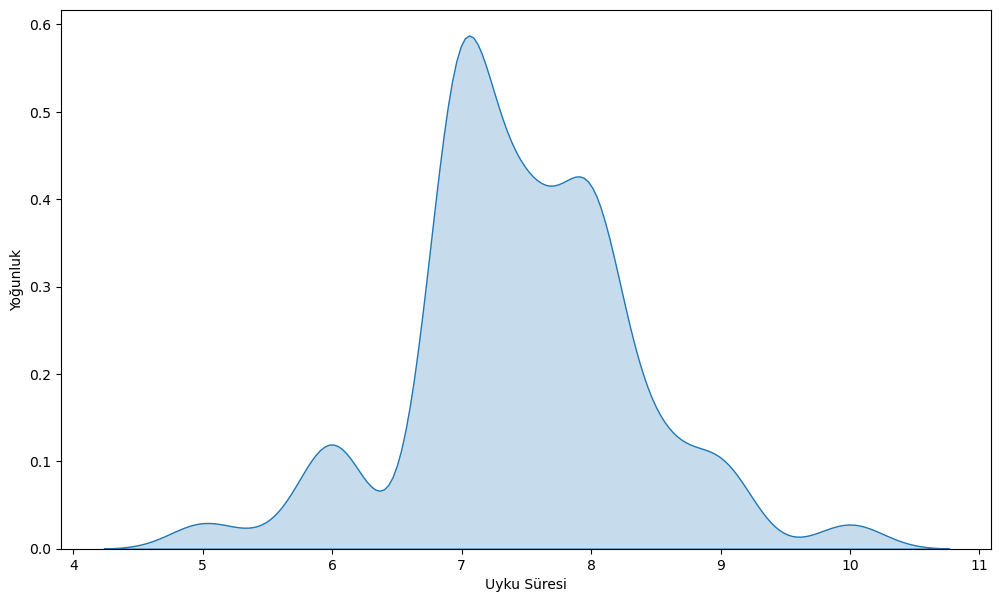

In [239]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df.Sleep_duration, fill = True) # kdeplot() bize yoğunluk grafiğini göstermektedir.
plt.xlabel("Uyku Süresi")
plt.ylabel("Yoğunluk")
plt.show()

Bu yoğunluk grafiğinde ise gördüğümüz üzere deneklerin çoğunun uyku süresi 7-8 saat aralığındadır.

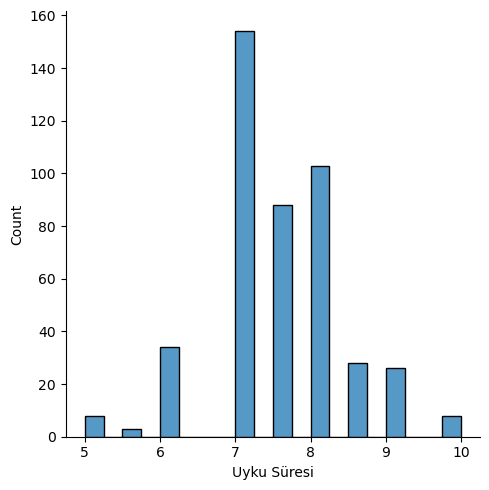

In [240]:
sns.displot(df["Sleep_duration"])
plt.xlabel("Uyku Süresi")
plt.show()

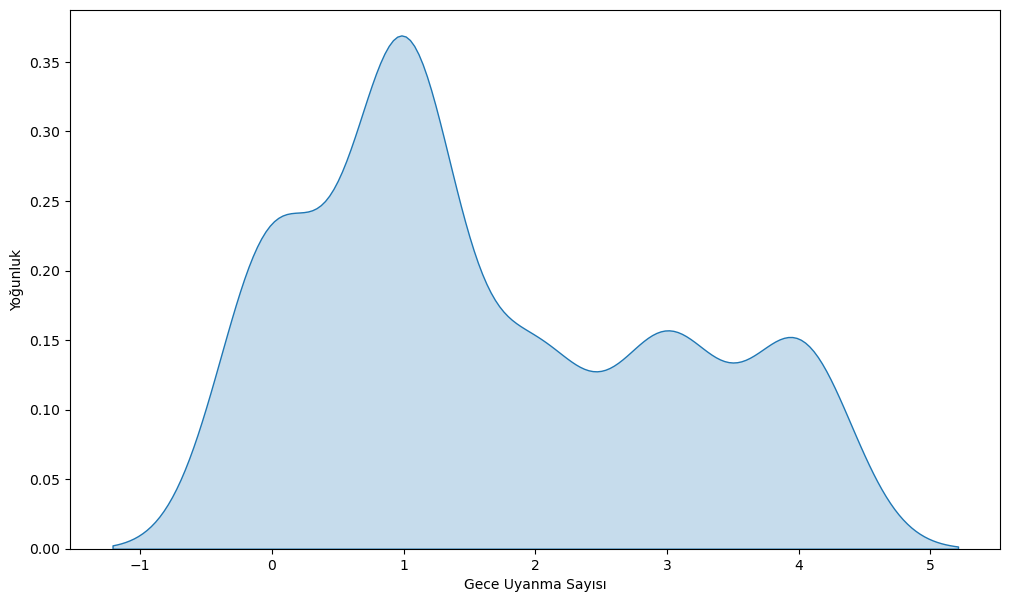

In [245]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df.Awakenings, fill = True) # kdeplot() bize yoğunluk grafiğini göstermektedir.
plt.xlabel("Gece Uyanma Sayısı")
plt.ylabel("Yoğunluk")
plt.show()

Burada görüldüğü üzere ise deneklerin bir çoğu gece en az bir kere uyanmaktadır.

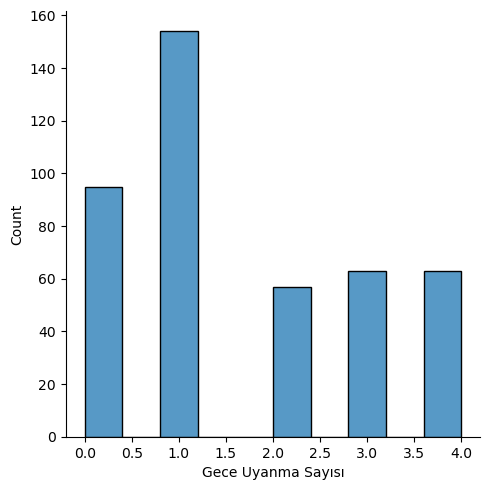

In [242]:
sns.displot(df["Awakenings"])
plt.xlabel("Gece Uyanma Sayısı")
plt.show()

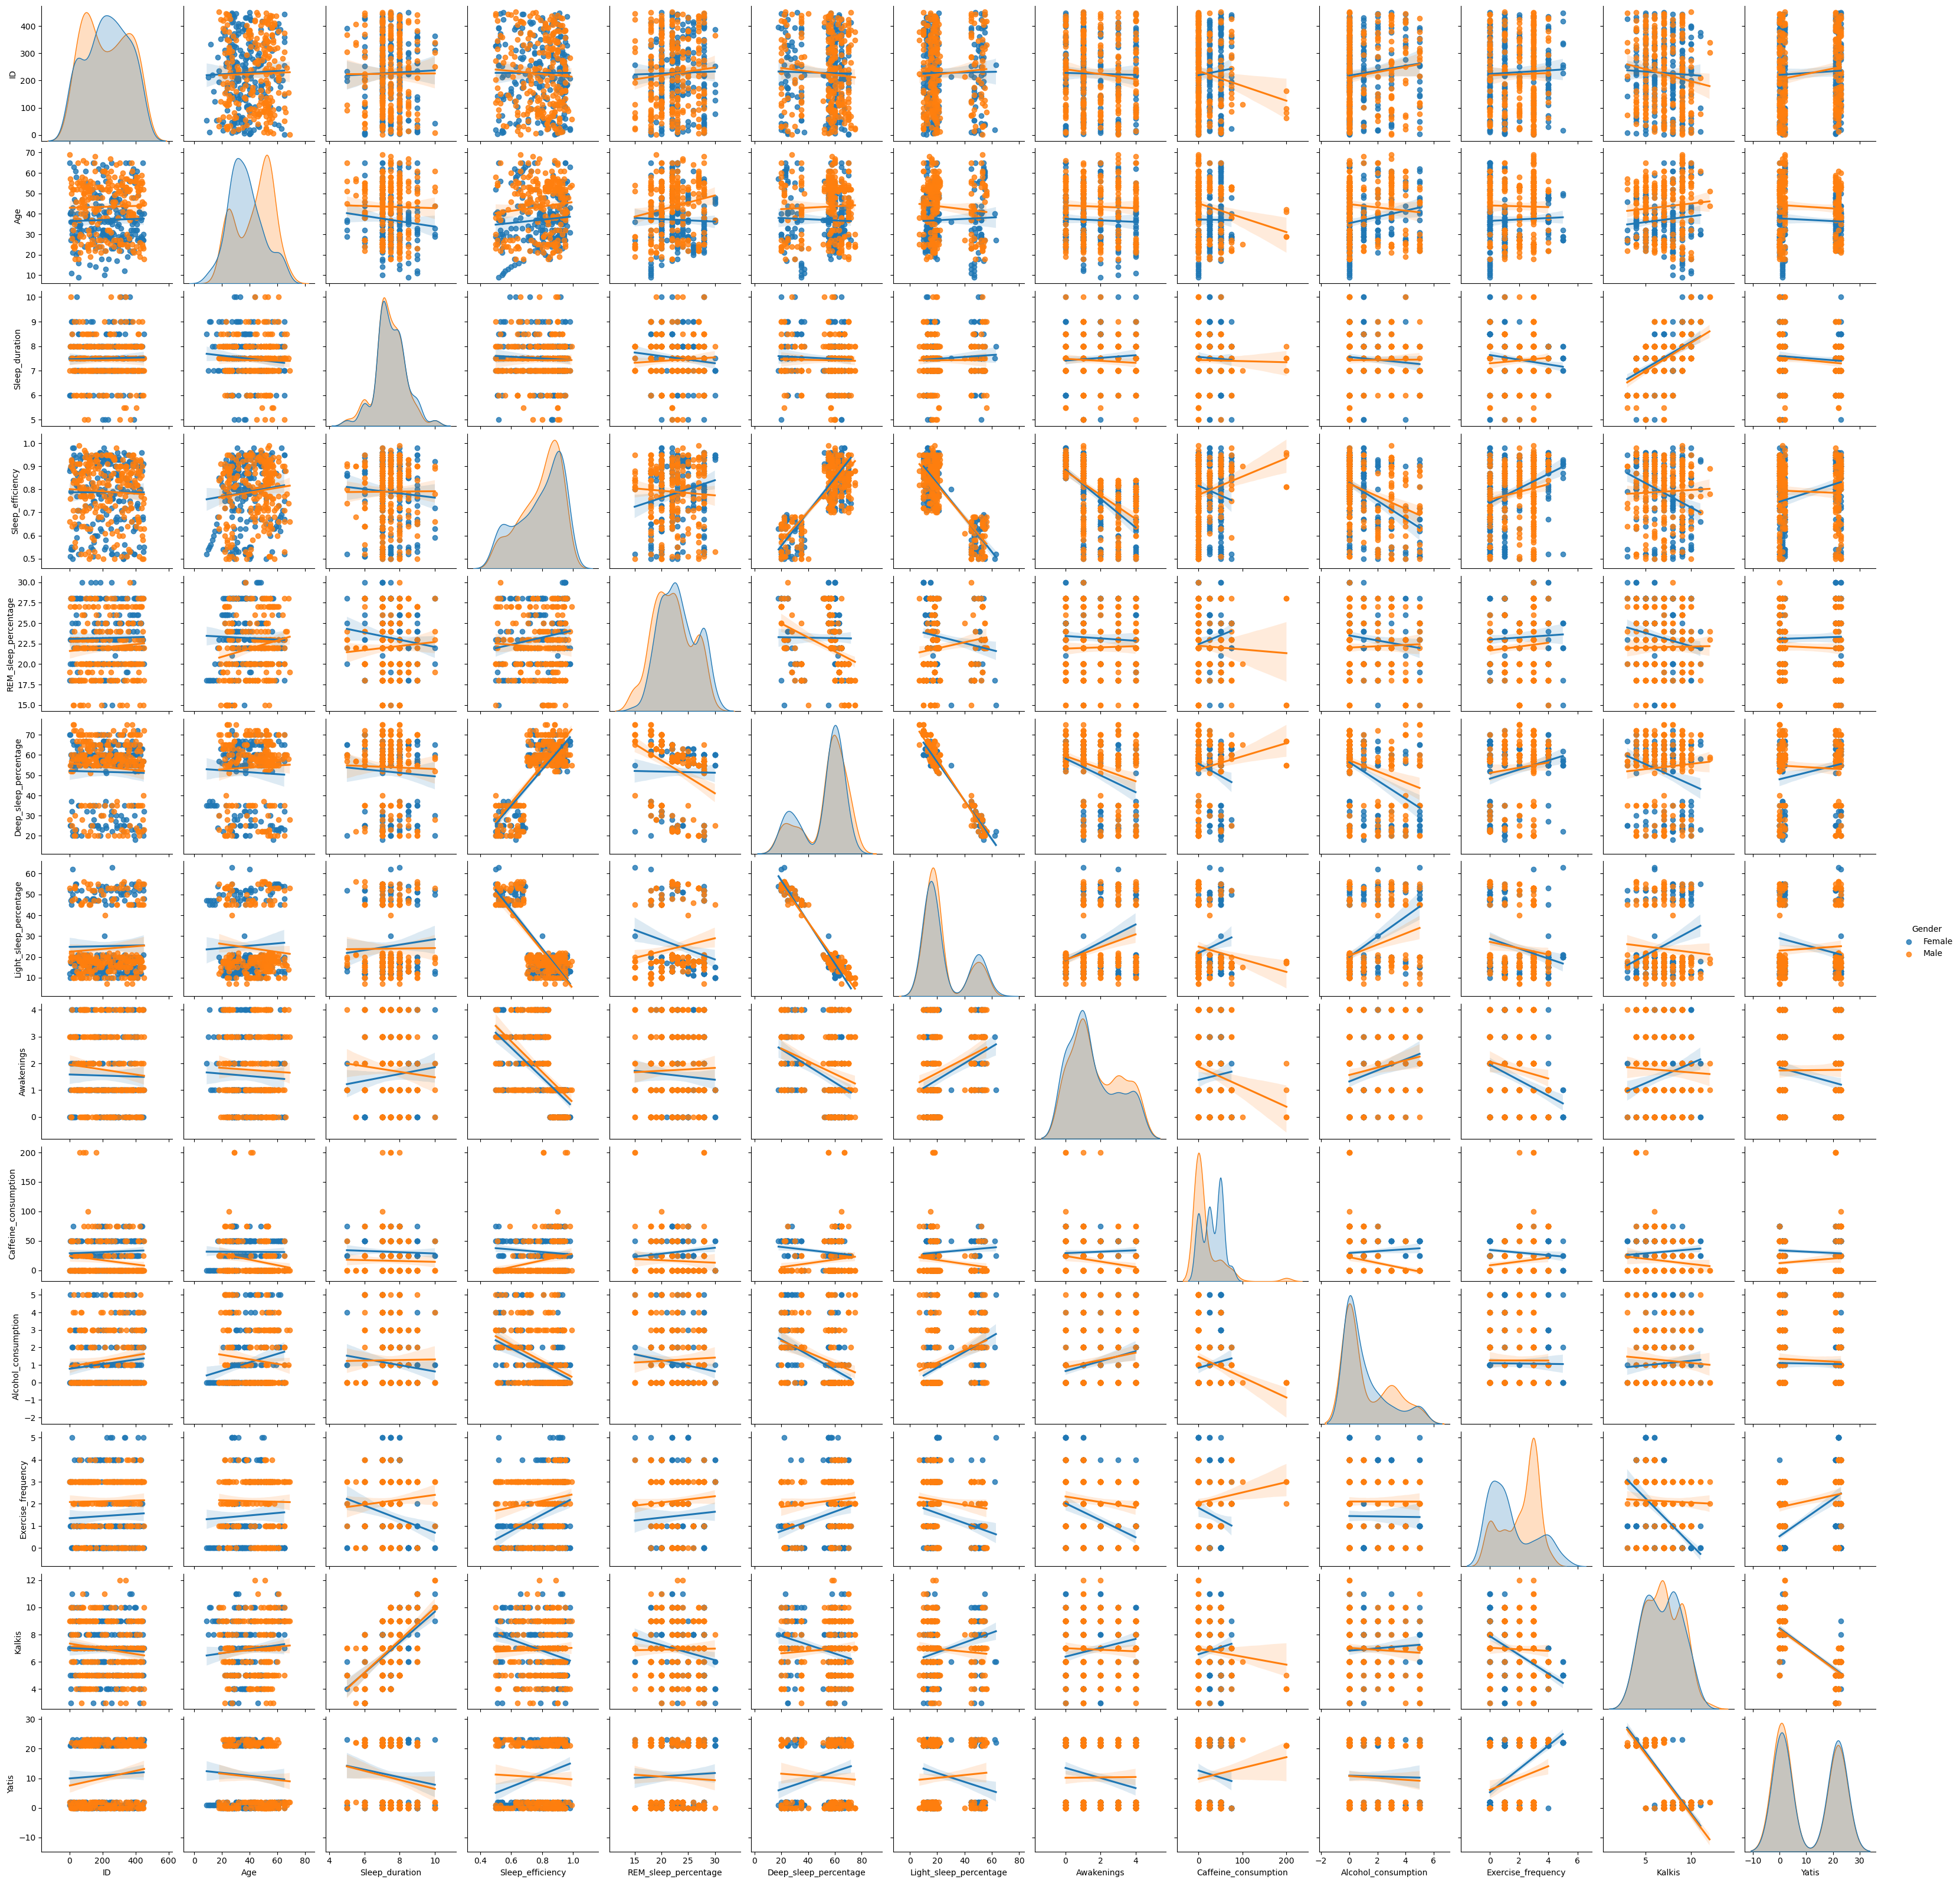

In [243]:
sns.pairplot(df, kind = "reg", hue = "Gender") # pairplot() tüm veri çerçevesi boyunca sayısal sütunlar için çift yönlü grafikleri oluşturmaktadır.

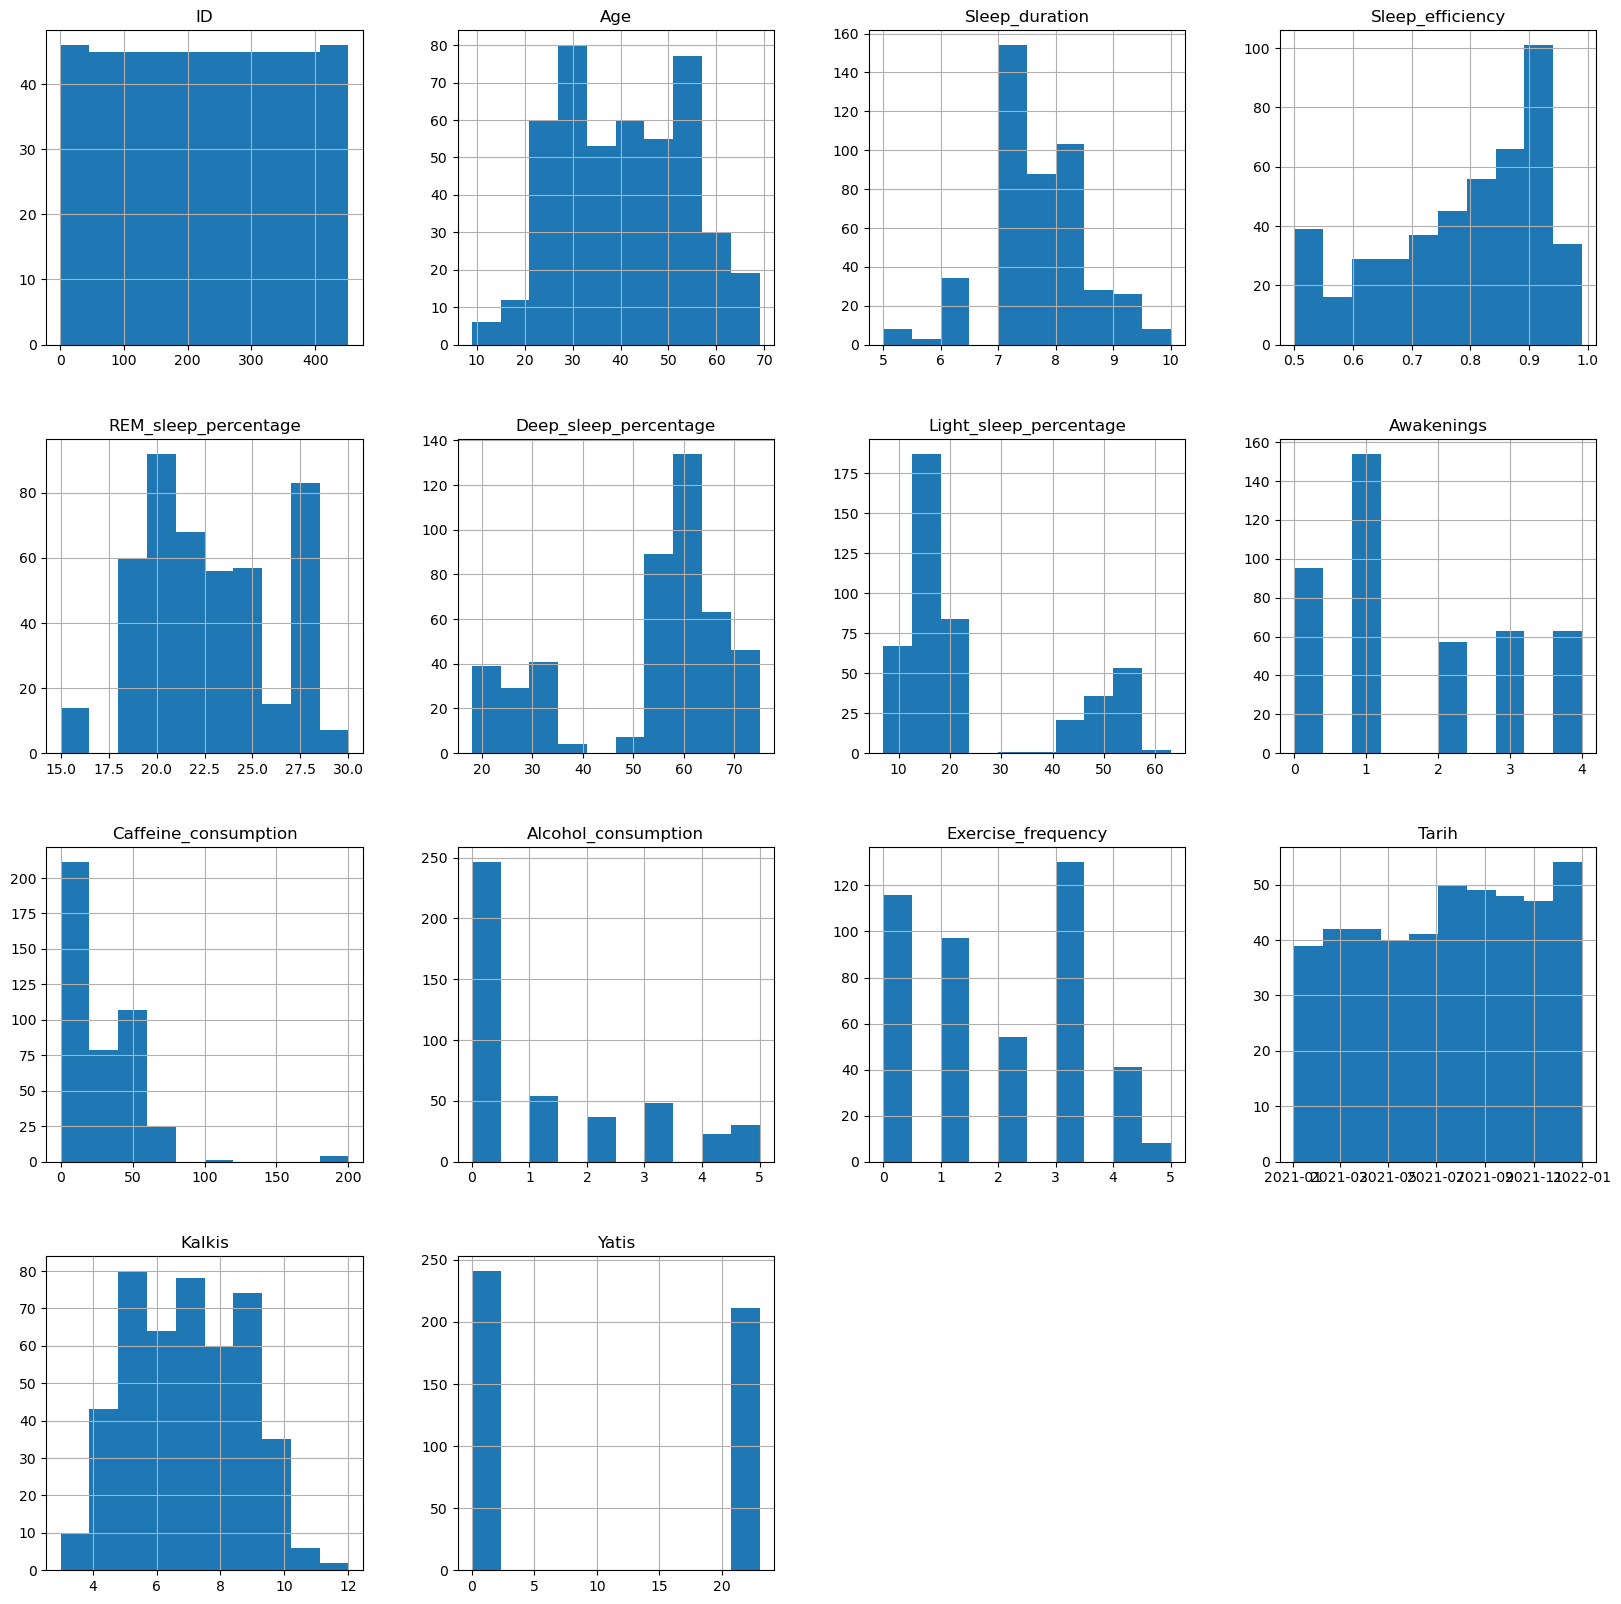

In [244]:
df.hist(figsize=(20, 20)) # hist() Veri çerçevesinin histogramlarını oluşturmaktadır.
plt.show()

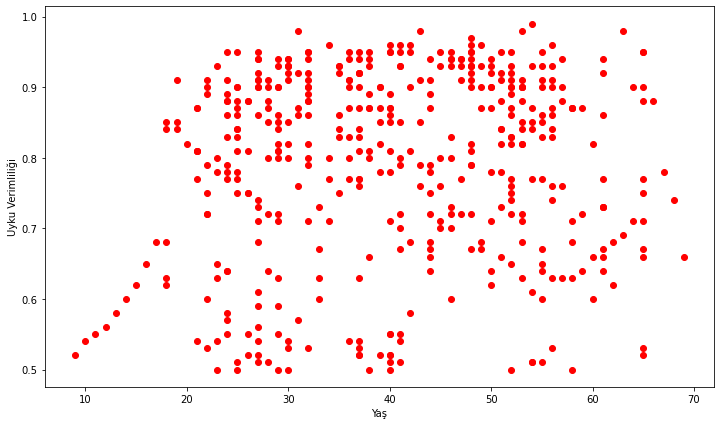

In [34]:
plt.figure(figsize=(12, 7))
plt.scatter(df.Age, df.Sleep_efficiency, color="red")
plt.xlabel("Yaş")
plt.ylabel("Uyku Verimliliği")
plt.show()

Burada farklı yaş gruplarının uyku verimliliği dağılımlarını görmekteyiz.

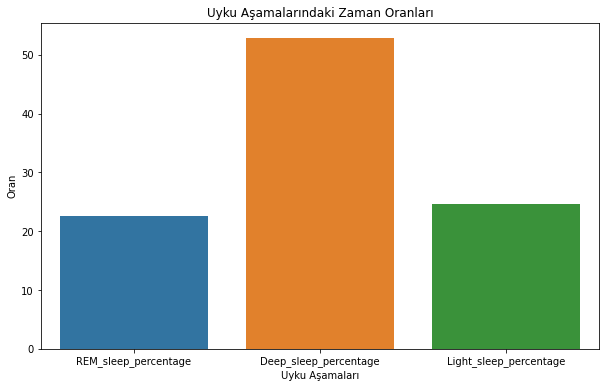

In [35]:
sleep_stage_df = df[['REM_sleep_percentage', 'Deep_sleep_percentage', 'Light_sleep_percentage']].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x = sleep_stage_df.index, y = sleep_stage_df.values)
plt.xlabel('Uyku Aşamaları')
plt.ylabel('Oran')
plt.title('Uyku Aşamalarındaki Zaman Oranları')
plt.show()

Bu grafiğe göre ise deneklerin uyku aşamalarının oranlarını görmekteyiz.

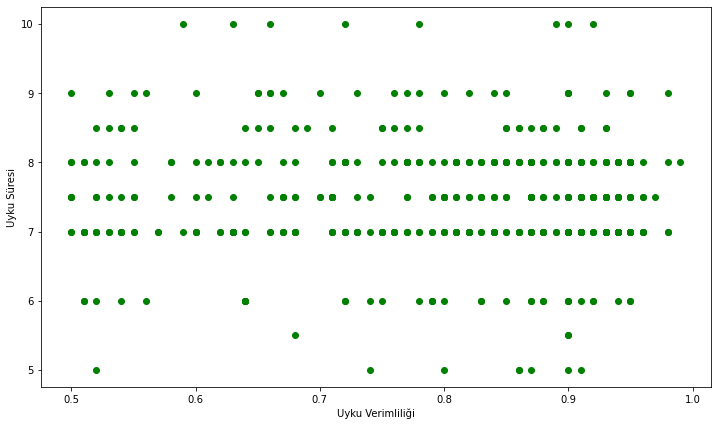

In [36]:
plt.figure(figsize=(12, 7))
plt.scatter(df.Sleep_efficiency, df.Sleep_duration, color="green")
plt.xlabel("Uyku Verimliliği")
plt.ylabel("Uyku Süresi")
plt.show()

Burada uyku süresi ve uyku verimliliği arasındaki ilişkiyi inceliyoruz. 7 ve 8 saatleri arasındaki uyku süresi sağlıklı bir uyku süresi olsada uyku verimliliklerinin eşit olmadığını görmekteyiz. Bu yüzden artık uyku verimliliği etkileyen egzersiz sıklığı, alkol ve kafein tüketimi ve sigara kullanımı gibi faktörleri inceleyelim.

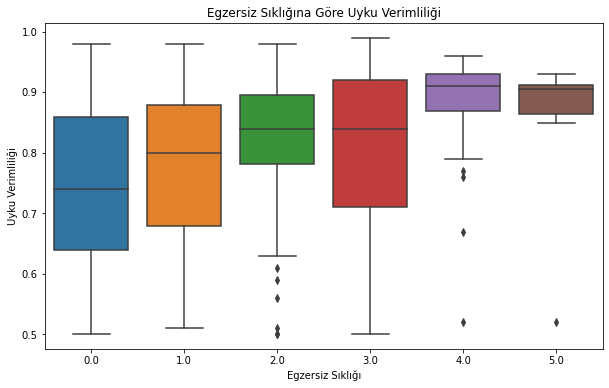

In [37]:
plt.figure(figsize=(10, 6)) # boxplot() dağılımın çeyrek değerlerini aşırı değerler ile birlikte göstermektedir.
sns.boxplot(x="Exercise_frequency", y="Sleep_efficiency", data=df)
plt.xlabel("Egzersiz Sıklığı")
plt.ylabel("Uyku Verimliliği")
plt.title("Egzersiz Sıklığına Göre Uyku Verimliliği")
plt.show()

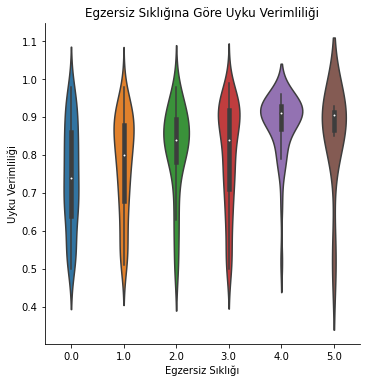

In [38]:
sns.catplot(x='Exercise_frequency', y='Sleep_efficiency', kind='violin', data=df) # Catplot, bir FacetGrid üzerine kategorik çizimler çizmektedir.
plt.xlabel('Egzersiz Sıklığı')
plt.ylabel('Uyku Verimliliği')
plt.title("Egzersiz Sıklığına Göre Uyku Verimliliği")
plt.show()

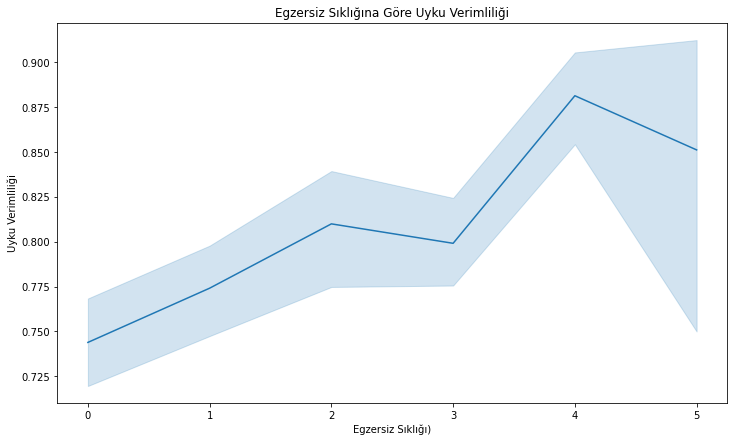

In [39]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x="Exercise_frequency", y= "Sleep_efficiency")
plt.xlabel("Egzersiz Sıklığı)")
plt.ylabel("Uyku Verimliliği")
plt.title("Egzersiz Sıklığına Göre Uyku Verimliliği")
plt.show()

Bu grafiklere göre ise egzersiz yapanların uyku verimliliği, yapmayanlara göre açık bir şekilde daha yüksektir.

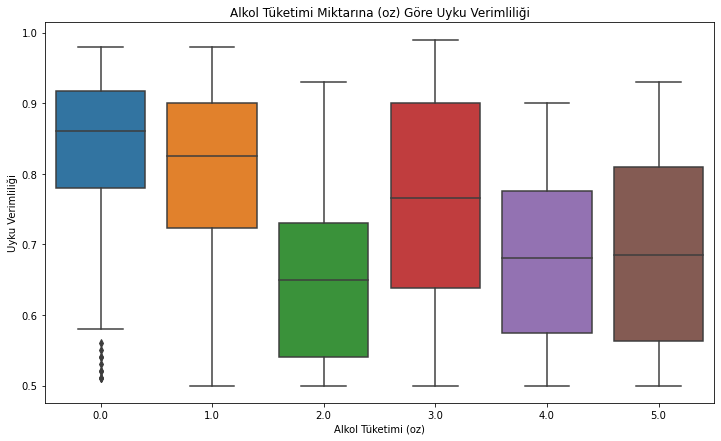

In [40]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Alcohol_consumption", y="Sleep_efficiency", data=df)
plt.xlabel("Alkol Tüketimi (oz)")
plt.ylabel("Uyku Verimliliği")
plt.title("Alkol Tüketimi Miktarına (oz) Göre Uyku Verimliliği")
plt.show()

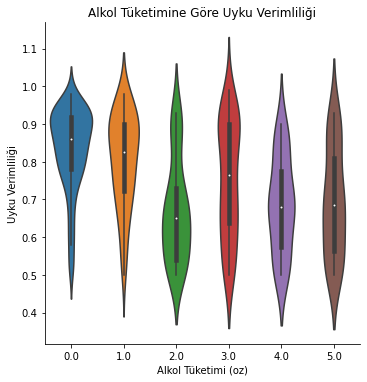

In [41]:
sns.catplot(x='Alcohol_consumption', y='Sleep_efficiency', kind='violin', data=df) # Catplot, bir FacetGrid üzerine kategorik çizimler çizmektedir.
plt.xlabel("Alkol Tüketimi (oz)")
plt.ylabel("Uyku Verimliliği")
plt.title("Alkol Tüketimine Göre Uyku Verimliliği")
plt.show()

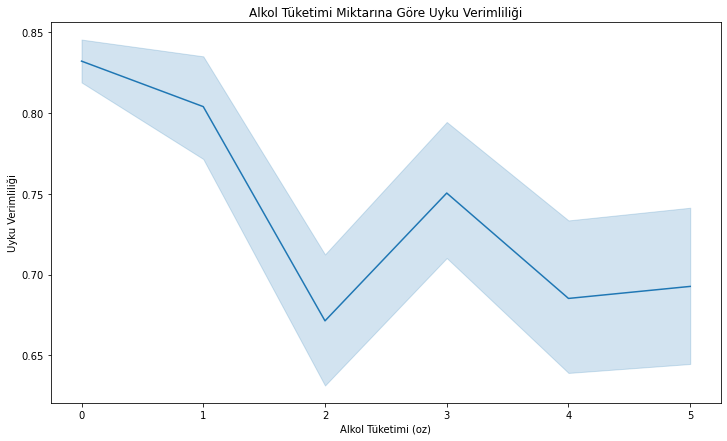

In [42]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x="Alcohol_consumption", y= "Sleep_efficiency")
plt.xlabel("Alkol Tüketimi (oz)")
plt.ylabel("Uyku Verimliliği")
plt.title("Alkol Tüketimi Miktarına Göre Uyku Verimliliği")
plt.show()

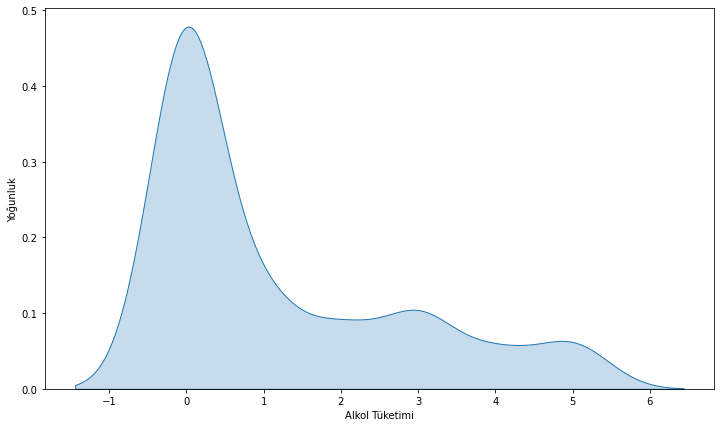

In [43]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df.Alcohol_consumption, shade = True) # kdeplot() bize yoğunluk grafiğini göstermektedir.
plt.xlabel("Alkol Tüketimi")
plt.ylabel("Yoğunluk")
plt.show()

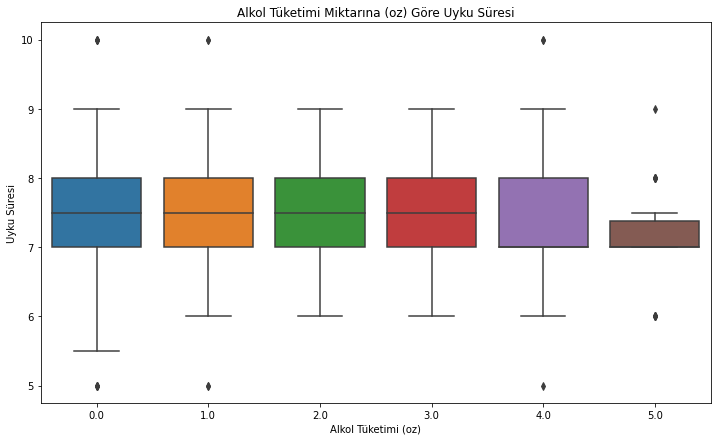

In [44]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Alcohol_consumption", y="Sleep_duration", data=df)
plt.xlabel("Alkol Tüketimi (oz)")
plt.ylabel("Uyku Süresi")
plt.title("Alkol Tüketimi Miktarına (oz) Göre Uyku Süresi")
plt.show()

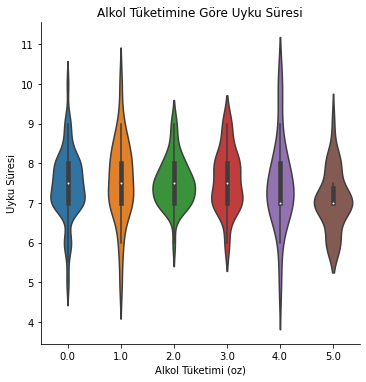

In [45]:
sns.catplot(x='Alcohol_consumption', y='Sleep_duration', kind='violin', data=df) # Catplot, bir FacetGrid üzerine kategorik çizimler çizmektedir.
plt.xlabel("Alkol Tüketimi (oz)")
plt.ylabel("Uyku Süresi")
plt.title("Alkol Tüketimine Göre Uyku Süresi")
plt.show()

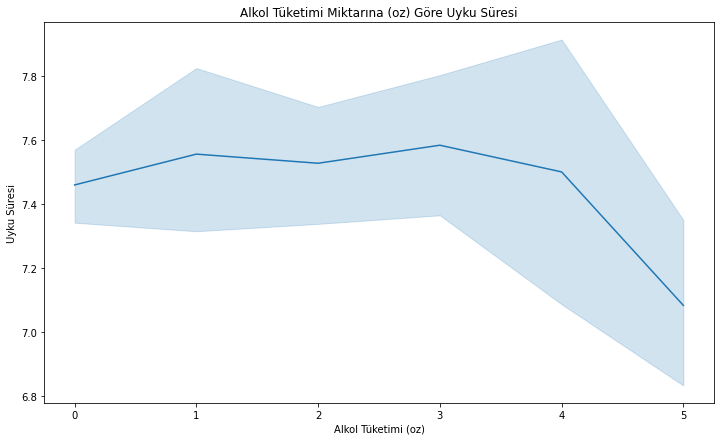

In [46]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x="Alcohol_consumption", y= "Sleep_duration")
plt.xlabel("Alkol Tüketimi (oz)")
plt.ylabel("Uyku Süresi")
plt.title("Alkol Tüketimi Miktarına (oz) Göre Uyku Süresi")
plt.show()

Yukarıdaki grafikleri incelersek alkol tüketimi uyku süresini çok azaltmıyor ama uyku verimliliğini azaltmaktadır.

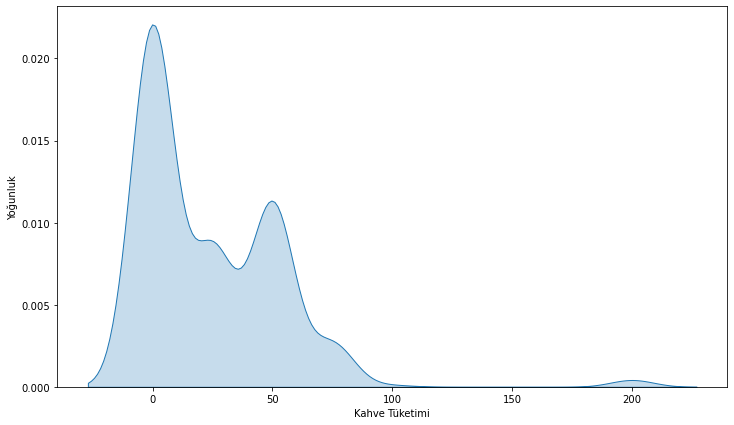

In [47]:
plt.figure(figsize=(12, 7))
sns.kdeplot(df.Caffeine_consumption, shade = True) # kdeplot() bize yoğunluk grafiğini göstermektedir.
plt.xlabel("Kahve Tüketimi")
plt.ylabel("Yoğunluk")
plt.show()

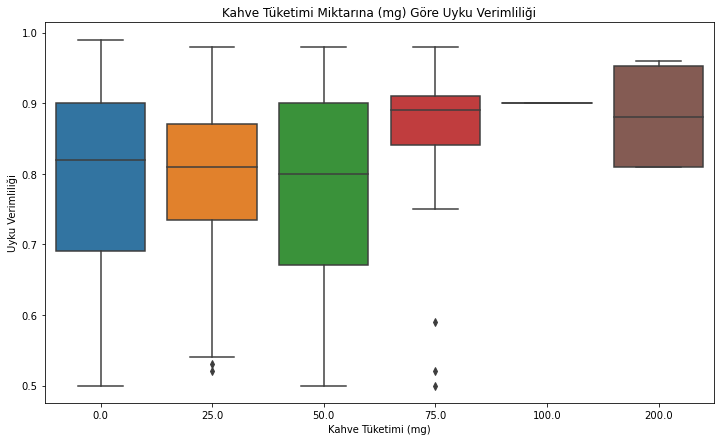

In [48]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Caffeine_consumption", y="Sleep_efficiency", data=df)
plt.xlabel("Kahve Tüketimi (mg)")
plt.ylabel("Uyku Verimliliği")
plt.title("Kahve Tüketimi Miktarına (mg) Göre Uyku Verimliliği")
plt.show()

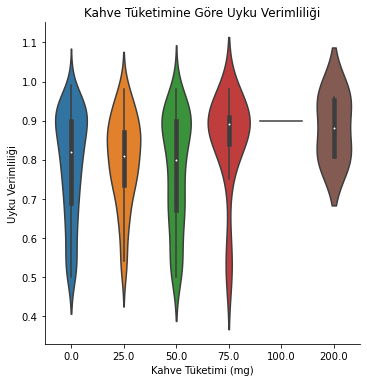

In [49]:
sns.catplot(x='Caffeine_consumption', y='Sleep_efficiency', kind='violin', data=df)
plt.xlabel("Kahve Tüketimi (mg)")
plt.ylabel("Uyku Verimliliği")
plt.title("Kahve Tüketimine Göre Uyku Verimliliği")
plt.show()

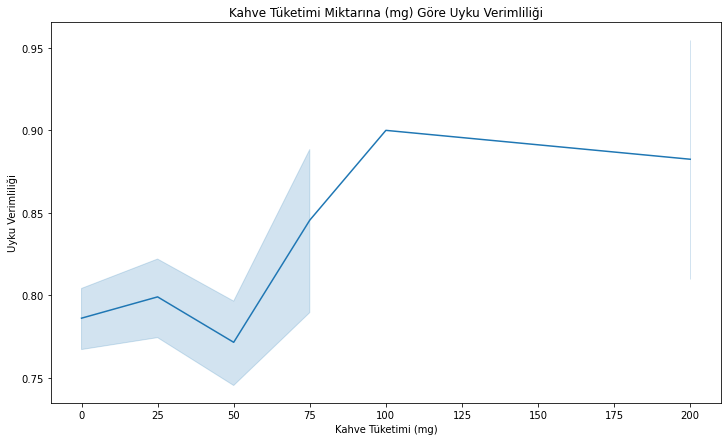

In [50]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x="Caffeine_consumption", y= "Sleep_efficiency")
plt.xlabel("Kahve Tüketimi (mg)")
plt.ylabel("Uyku Verimliliği")
plt.title("Kahve Tüketimi Miktarına (mg) Göre Uyku Verimliliği")
plt.show()

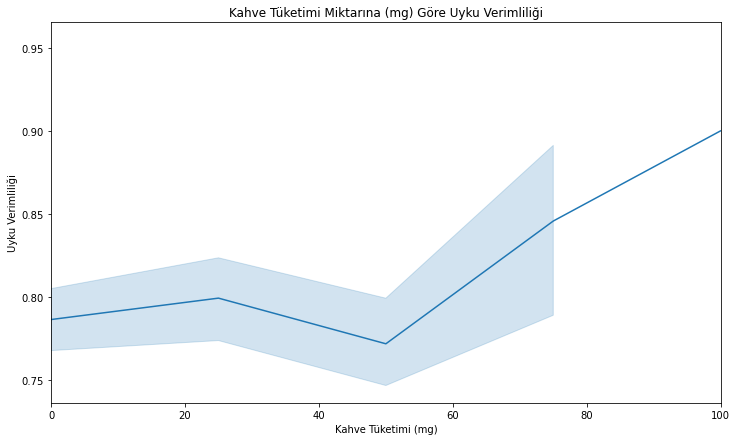

In [51]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x="Caffeine_consumption", y= "Sleep_efficiency")
plt.xlabel("Kahve Tüketimi (mg)")
plt.ylabel("Uyku Verimliliği")
plt.title("Kahve Tüketimi Miktarına (mg) Göre Uyku Verimliliği")
xmin=0
xmax=100
plt.xlim(xmin,xmax)
plt.show()

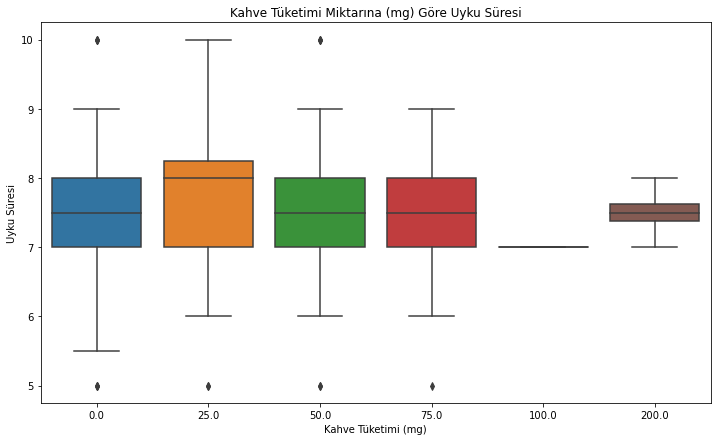

In [52]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Caffeine_consumption", y="Sleep_duration", data=df)
plt.xlabel("Kahve Tüketimi (mg)")
plt.ylabel("Uyku Süresi")
plt.title("Kahve Tüketimi Miktarına (mg) Göre Uyku Süresi")
plt.show()

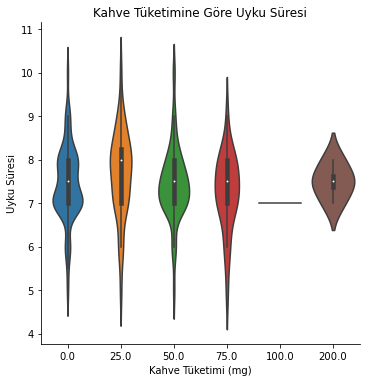

In [53]:
sns.catplot(x='Caffeine_consumption', y='Sleep_duration', kind='violin', data=df)
plt.xlabel("Kahve Tüketimi (mg)")
plt.ylabel("Uyku Süresi")
plt.title("Kahve Tüketimine Göre Uyku Süresi")
plt.show()

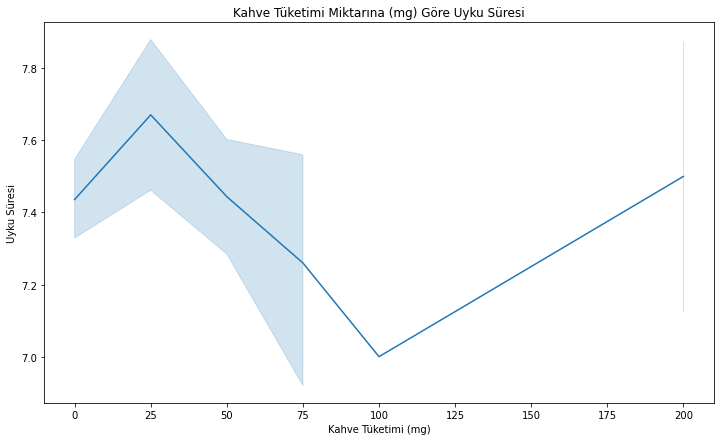

In [54]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x="Caffeine_consumption", y= "Sleep_duration")
plt.xlabel("Kahve Tüketimi (mg)")
plt.ylabel("Uyku Süresi")
plt.title("Kahve Tüketimi Miktarına (mg) Göre Uyku Süresi")
plt.show()

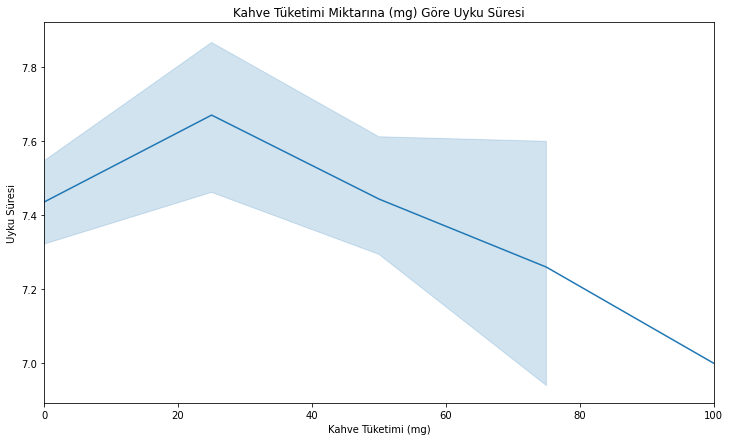

In [55]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x="Caffeine_consumption", y= "Sleep_duration")
plt.xlabel("Kahve Tüketimi (mg)")
plt.ylabel("Uyku Süresi")
plt.title("Kahve Tüketimi Miktarına (mg) Göre Uyku Süresi")
xmin=0
xmax=100
plt.xlim(xmin,xmax)
plt.show()

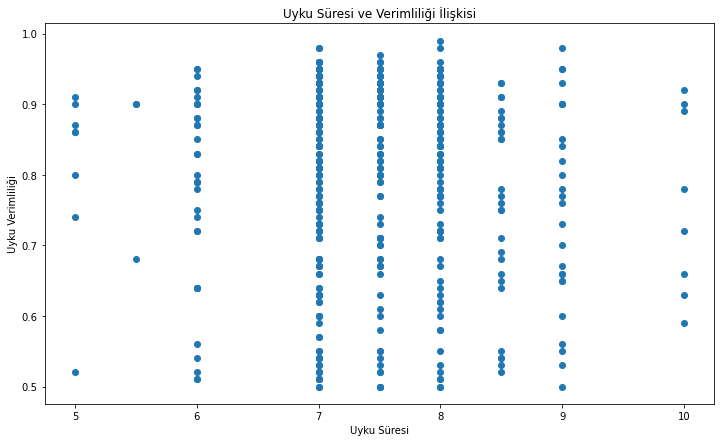

In [56]:
plt.figure(figsize=(12, 7))
plt.scatter(x="Sleep_duration", y="Sleep_efficiency", data=df)
plt.xlabel('Uyku Süresi')
plt.ylabel('Uyku Verimliliği')
plt.title('Uyku Süresi ve Verimliliği İlişkisi')
plt.show()

Bu grafikte görüldüğü üzere uyku süresi 6, 7 ve 8 saat olanların uyku verimliliği oranı daha yüksektir.

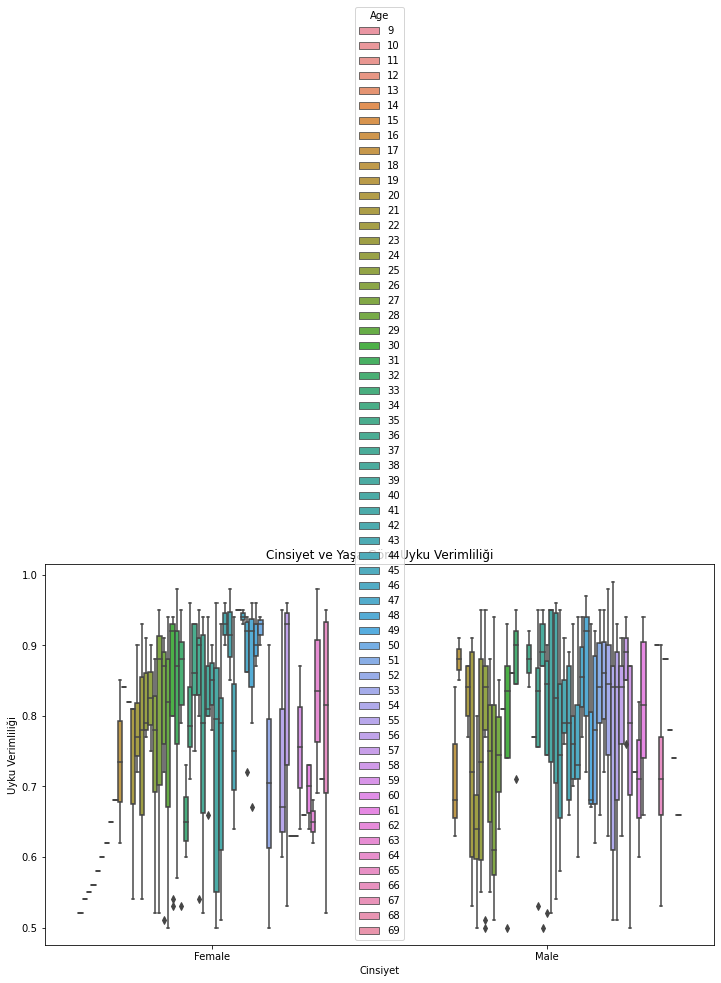

In [57]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender', y='Sleep_efficiency', hue='Age', data=df)
plt.xlabel('Cinsiyet')
plt.ylabel('Uyku Verimliliği')
plt.title('Cinsiyet ve Yaşa Göre Uyku Verimliliği')
plt.show()

Burada gördüğümüz üzere kadınların uyku verimliliği erkeklerden daha yüksektir. Ayrıca yaş faktörünün artmasıyla beraber uyku verimliliğinin azaldığı görülmektedir.

In [58]:
from scipy.stats import ttest_ind

sigara_icenler = df[df["Smoking_status"] == 'Yes']["Sleep_efficiency"]
sigara_icmeyenler = df[df["Smoking_status"] == 'No']["Sleep_efficiency"]

t_stat, p_val = ttest_ind(sigara_icenler, sigara_icmeyenler, equal_var=False)

print('Sigara İçenlerin Uyku Verimliliği Ortalaması: {:.2f}'.format(sigara_icenler.mean()))
print('Sigara İçmeyenlerin Uyku Verimliliği Ortalaması: {:.2f}'.format(sigara_icmeyenler.mean()))
print('t-statistic: {:.2f}, p-value: {:.4f}'.format(t_stat, p_val))

Sigara İçenlerin Uyku Verimliliği Ortalaması: 0.73
Sigara İçmeyenlerin Uyku Verimliliği Ortalaması: 0.82
t-statistic: -5.70, p-value: 0.0000


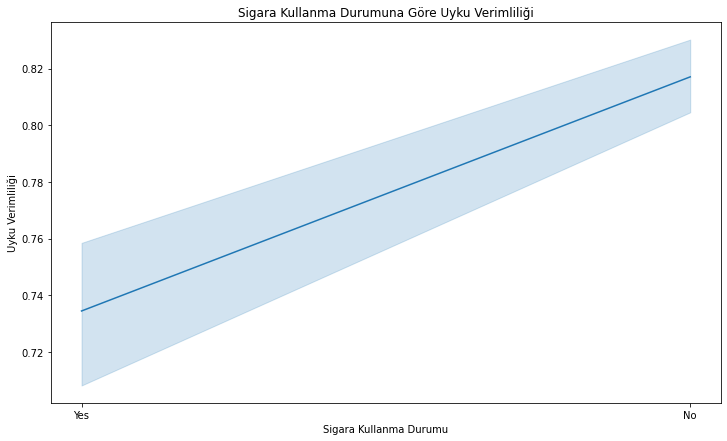

In [63]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x="Smoking_status", y= "Sleep_efficiency")
plt.xlabel("Sigara Kullanma Durumu")
plt.ylabel("Uyku Verimliliği")
plt.title("Sigara Kullanma Durumuna Göre Uyku Verimliliği")
plt.show()

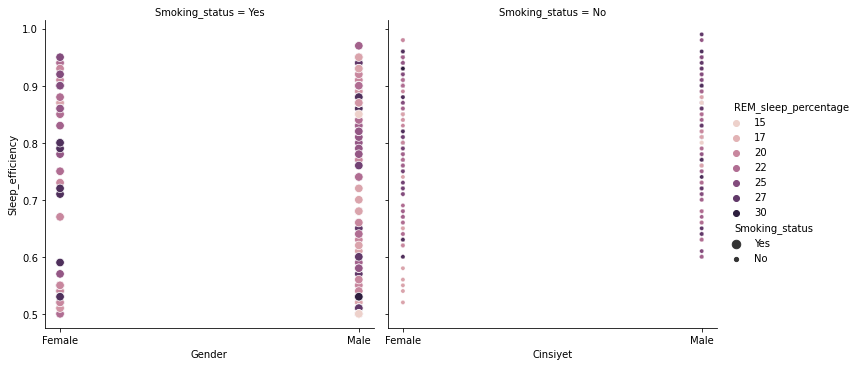

In [64]:
sns.relplot(
    data=df,
    x="Gender", y="Sleep_efficiency", col="Smoking_status",
    hue="REM_sleep_percentage", size="Smoking_status",
)
plt.xlabel("Cinsiyet")
plt.ylabel("Uyku Verimliliği")
plt.show()

Buradaki grafiklerde cinsiyete ve sigara içme durumuna göre uyku verimliliği dağılımlarını görebiliriz. REM Uykusu yüzdesi farklı etkenlere olarak değişse de sigara içmeyenlerin içenlere göre uyku verimliliği değeri genel olarak daha yüksektir.

<Figure size 864x504 with 0 Axes>

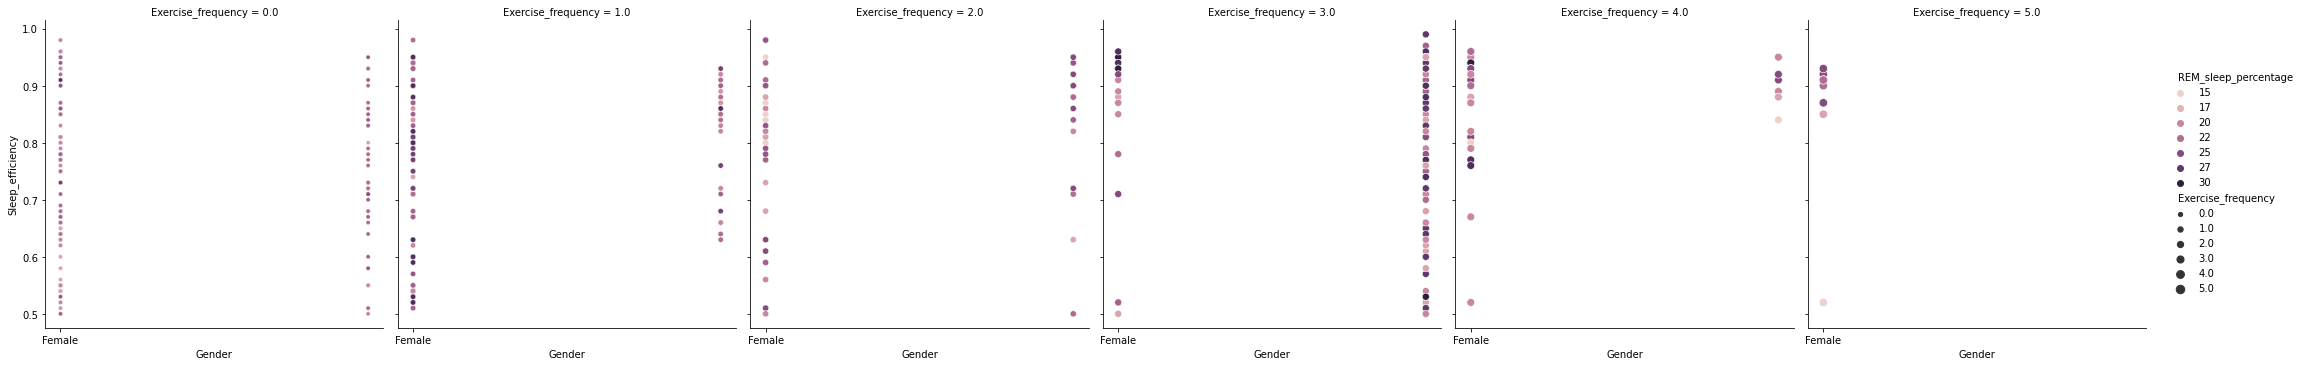

In [65]:
plt.figure(figsize=(12,7))
sns.relplot(
    data=df,
    x="Gender", y="Sleep_efficiency", col="Exercise_frequency",
    hue="REM_sleep_percentage", size="Exercise_frequency")

plt.show()

Yine burada cinsiyetlere ve egzersiz sıklığına göre uyku verimliliği dağılımlarını görebiliriz. Egzersiz sıklığı yükseldikçe açık bir şekilde uyku verimliliğinin arttığını görmekteyiz. Ayrıca genel olarak egzersiz sıklığı yüksek olanların REM uykusu oranı çoğu oranda olması gerektiği gibidir.

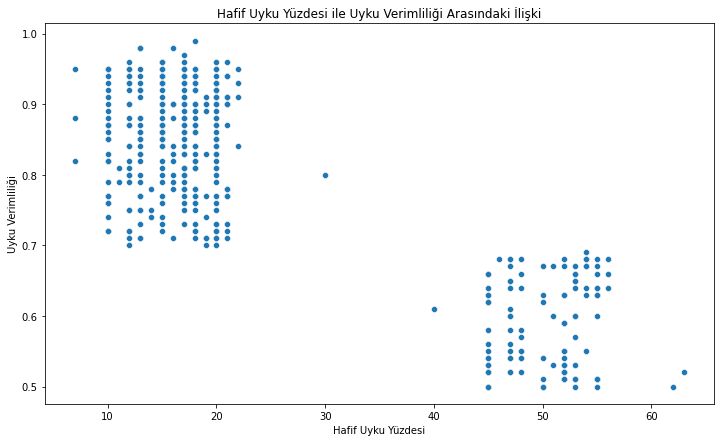

In [66]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Light_sleep_percentage', y='Sleep_efficiency', data=df)
plt.xlabel('Hafif Uyku Yüzdesi')
plt.ylabel('Uyku Verimliliği')
plt.title('Hafif Uyku Yüzdesi ile Uyku Verimliliği Arasındaki İlişki')
plt.show()

Bu grafikte hafif uyku yüzdesi ile uyku verimliliği arasındaki ilişkiyi görmekteyiz. 

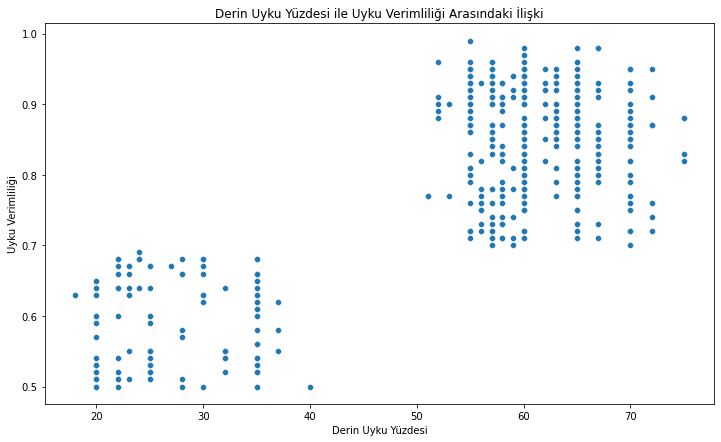

In [67]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Deep_sleep_percentage', y='Sleep_efficiency', data=df)
plt.xlabel('Derin Uyku Yüzdesi')
plt.ylabel('Uyku Verimliliği')
plt.title('Derin Uyku Yüzdesi ile Uyku Verimliliği Arasındaki İlişki')
plt.show()

Bu grafikte derin uyku yüzdesi ile uyku verimliliği arasındaki ilişkiyi görmekteyiz. 

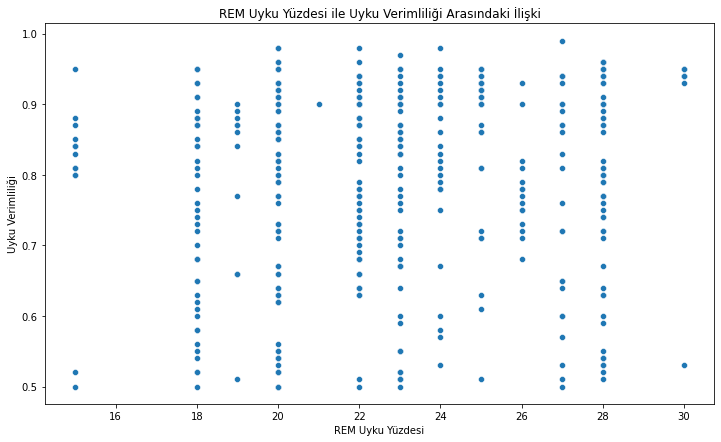

In [68]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='REM_sleep_percentage', y='Sleep_efficiency', data=df)
plt.xlabel("REM Uyku Yüzdesi")
plt.ylabel("Uyku Verimliliği")
plt.title('REM Uyku Yüzdesi ile Uyku Verimliliği Arasındaki İlişki')
plt.show()

Bu grafikte REM uyku yüzdesi ile uyku verimliliği arasındaki ilişkiyi görmekteyiz. 

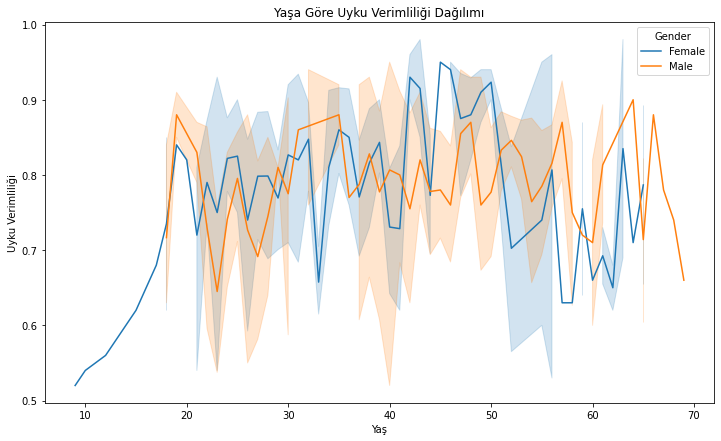

In [69]:
plt.figure(figsize=(12,7))
sns.lineplot(x='Age', y='Sleep_efficiency', hue='Gender', data=df)
plt.xlabel('Yaş')
plt.ylabel('Uyku Verimliliği')
plt.title('Yaşa Göre Uyku Verimliliği Dağılımı')
plt.show()

Bu grafik, yaşa ve cinsiyete göre uyku verimliliği dağılımlarını göstermektedir. Görüldüğü üzere yaşın uyku verimliliği üzerine ciddi bir etkisi bulunmaktadır.

<b> Spearman Brown Sıra Farkları Korelasyonu:  </b> Sıralı puanlar kullanılarak ölçülen iki değişken arasındaki doğrusal
ilişkiyi açıklar. Matematik notasyon olarak çok defa eski Yunan harfi ρ (rho okunur) ile belirtilir. Bir parametrik olmayan istatistik ölçüsüdür ve iki değişken arasındaki bağımlılık, yani korelasyon, ölçüsü olarak bulunup kullanılır.

In [59]:
df[['Sleep_duration', 'Sleep_efficiency']].corr()

Sleep_duration  Sleep_efficiency
Sleep_duration          1.000000         -0.027467
Sleep_efficiency       -0.027467          1.000000

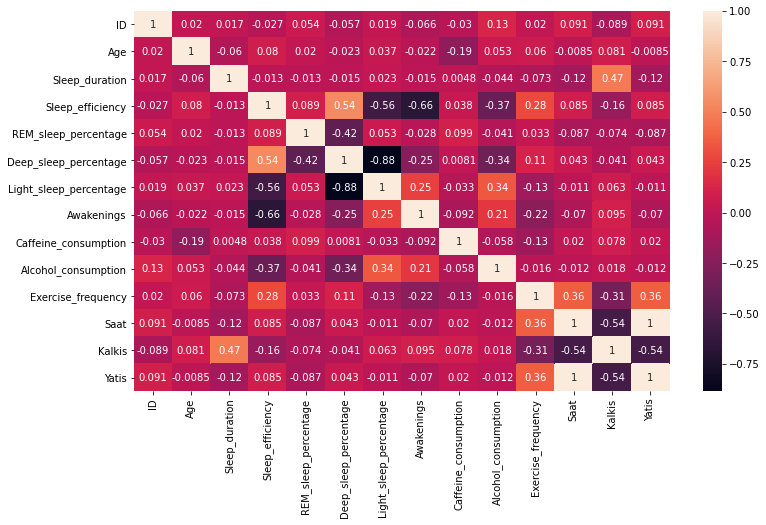

In [92]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(method="spearman"), annot=True) 
plt.show()

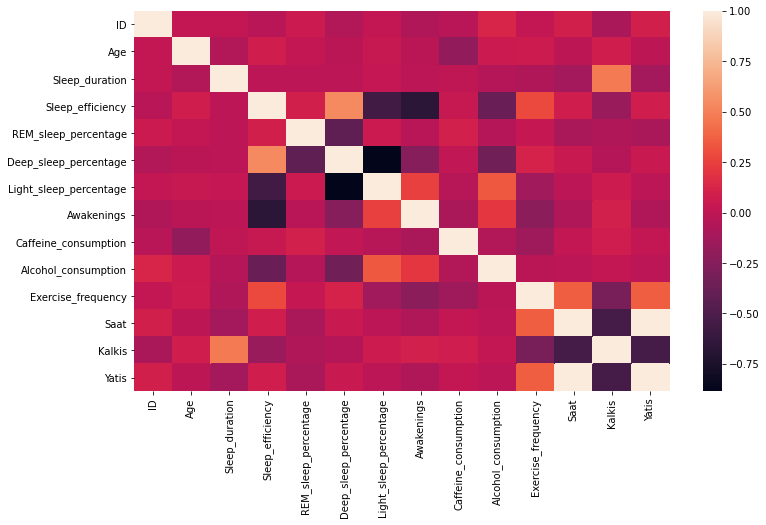

In [91]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(method='spearman'), annot=False) #annot değişkenini false olarak atadığımızda
                                                     #kutuların içindeki değerleri göstermez.
plt.show()

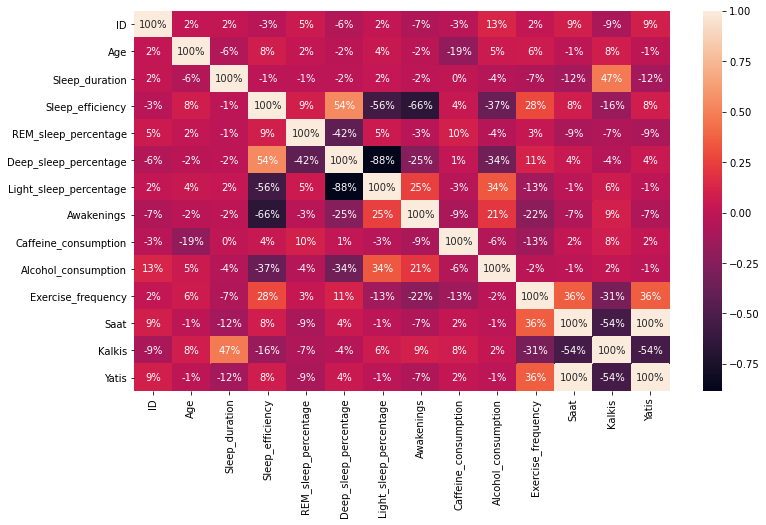

In [87]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(method="spearman"), annot=True, fmt=".0%") # fmt değişkenini % olarak atadığımızda 
                                                               # kutuların içindeki değerleri % olarak
plt.show()                                                     # vermektedir.

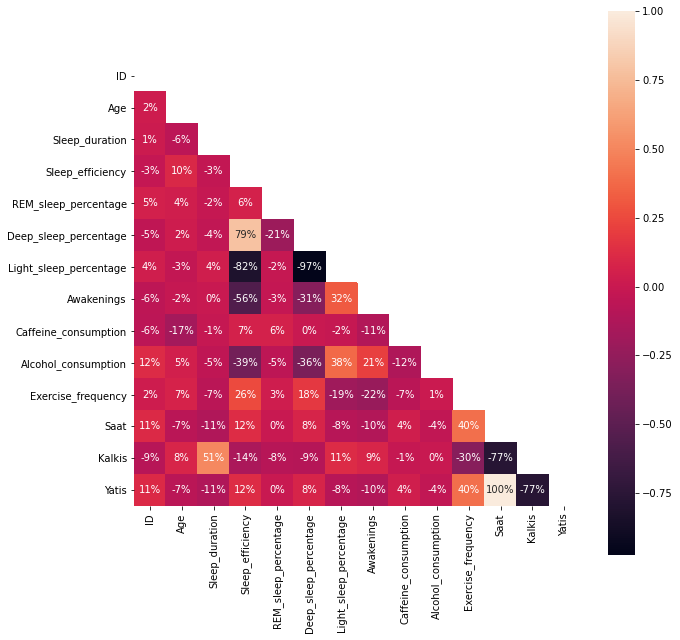

In [90]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(df.corr())
mask[np.tril_indices_from(mask)] = True
corr = df.corr()
sns.heatmap(corr, vmax=1, square = True, mask=mask.T, annot = True, fmt=".0%")
plt.show()

-----------
## Sonuç

Uyku verimliliğini ve uyku süresini birçok parametre eklemektedir. Yaş, cinsiyet, sigara ve alkol tüketimleri direkt olarak uyku süresini ve verimliliğini etkilemektedir. Uyku verimliliğini arttırmak için egzersiz yapılmalı, alkol ve sigara tüketimi azaltılmalı, kahve tüketimi sınırlandırılmalıdır.

-----